## Классификация Наивным Байесовским классификатором (Naive Bayes)

Наивный байесовский классификатор - это простой вероятностный алгоритм машинного обучения, который используется для решения задач классификации. Он основан на байесовском подходе к статистике и предполагает "наивное" предположение о независимости признаков.

Принцип работы наивного байесовского классификатора основан на оценке апостериорной вероятности класса на основе вероятностей признаков. Алгоритм тренируется на маркированных обучающих данных, состоящих из набора признаков и соответствующих им меток классов. Затем, на основе этих данных, строятся условные вероятности признаков для каждого класса.

Одним из преимуществ наивного байесовского классификатора является его относительная простота и скорость работы, особенно на больших объемах данных. Однако, его недостатком является его "наивное" предположение о независимости признаков, что может не всегда соответствовать реальности данных. Если признаки действительно зависимы, то наивный байесовский классификатор может давать неточные результаты. Также, наивный байесовский классификатор может иметь ограниченные возможности в моделировании сложных взаимосвязей между признаками.

Тем не менее, наивный байесовский классификатор широко используется в ряде задач, таких как классификация текстов, спам-фильтрация, определение тональности текста, медицинская диагностика и других областях, где его простота и относительно хорошая производительность могут быть полезными. Он также может быть использован в качестве базового алгоритма в ансамблевых методах, таких как наивный байесовский баггинг или наивный байесовский стекинг, для улучшения точности классификации.

Алгоритм основан на понятии условной вероятности (наступление события A при условии наступления события B):

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

где $P(A), P(B)$ - полные вероятности наступления события A и B, $P(B|A)$ - вероятность наступления события B при истинности гипотезы A

Допустим, у нас есть набор данных о погоде, содержащий информацию о 
температуре: 
* высокая (3)
* средняя (2), 
* низкая (1), 

влажности:
* высокая (3)
* средняя (2), 
* низкая (1) 

и ветре: 
* сильный (2)
* слабый (1). 

Используя этот набор данных, мы хотим построить наивный байесовский классификатор для прогнозирования, будет ли завтра солнечный день ("Yes") - 1 или дождливый день ("No") - 0.


#### Простой пример

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Создаем обучающий набор данных 
# (температура / влажность / ветер)
X = np.array([
        [3, 3, 1],
        [3, 3, 2],
        [2, 3, 1],
        [1, 2, 1],
        [1, 1, 1],
        [1, 1, 2],
        [2, 1, 2],
        [3, 2, 1],
        [3, 1, 1],
        [1, 2, 1],
        [3, 2, 2],
        [2, 3, 2],
        [2, 2, 1],
        [1, 3, 2]
])

y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

# Создаем наивный байесовский классификатор
clf = GaussianNB()

# Обучаем классификатор на обучающих данных
clf.fit(X, y)

# Предсказываем класс для нового наблюдения
new_observation = np.array([2, 3, 1])
predicted_class = clf.predict([new_observation])
print(f"Завтра : {predicted_class}", )

Завтра : [1]


### Рассмотрим на реальном наборе данных


In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("loan_train.csv")
dt = pd.read_csv("loan_test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:
# ради примера не будем заморачиваться с пропущенными данными ;)
dfn = df.dropna()
dtn = dt.dropna()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 50.7+ KB


In [6]:
# закодировать строковые категории - нужно
gendEnc = LabelEncoder()
gendCol = gendEnc.fit_transform(dfn.Gender)

marrEnc = LabelEncoder()
marrCol = marrEnc.fit_transform(dfn.Married)

depEnc = LabelEncoder()
depCol = depEnc.fit_transform(dfn.Dependents)

eduEnc = LabelEncoder()
eduCol = eduEnc.fit_transform(dfn.Education)

semplEnc = LabelEncoder()
semplCol = semplEnc.fit_transform(dfn.Self_Employed)

areaEnc = LabelEncoder()
areaCol = areaEnc.fit_transform(dfn.Area)

statEnc = LabelEncoder()
statCol = statEnc.fit_transform(dfn.Status)

dfn.Gender = gendCol
dfn.Married = marrCol
dfn.Dependents = depCol
dfn.Education = eduCol
dfn.Self_Employed = semplCol
dfn.Area = areaCol
dfn.Status

dfn

/home/dmitry/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,Y
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,N
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,Y
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,Y
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,Y
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,Y
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,Y
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,Y


In [16]:
eduEnc.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:>

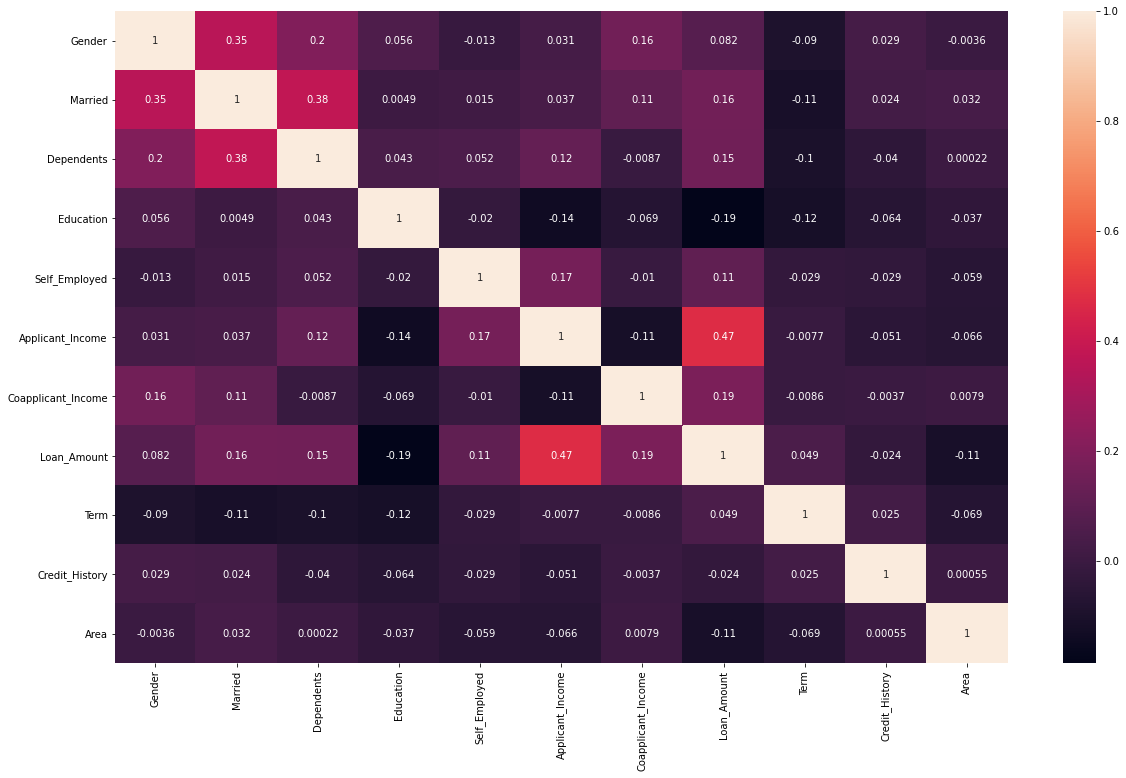

In [15]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(dfn.corr(), annot = True)

In [7]:
# закодировать тестовый набор
gendCol = gendEnc.fit_transform(dtn.Gender)

marrCol = marrEnc.fit_transform(dtn.Married)

depCol = depEnc.fit_transform(dtn.Dependents)

eduCol = eduEnc.fit_transform(dtn.Education)

semplCol = semplEnc.fit_transform(dtn.Self_Employed)

areaCol = areaEnc.fit_transform(dtn.Area)

#statCol = statEnc.fit_transform(dtn.Status)

dtn.Gender = gendCol
dtn.Married = marrCol
dtn.Dependents = depCol
dtn.Education = eduCol
dtn.Self_Employed = semplCol
dtn.Area = areaCol
#dtn.Status

dtn

/home/dmitry/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,1,1,0,0,0,572000,0,11000000,360.0,1.0,2
1,1,1,1,0,0,307600,150000,12600000,360.0,1.0,2
2,1,1,2,0,0,500000,180000,20800000,360.0,1.0,2
4,1,0,0,1,0,327600,0,7800000,360.0,1.0,2
5,1,1,0,1,1,216500,342200,15200000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,226900,216700,9900000,360.0,1.0,1
362,1,1,3,1,1,400900,177700,11300000,360.0,1.0,2
363,1,1,0,0,0,415800,70900,11500000,360.0,1.0,2
365,1,1,0,0,0,500000,239300,15800000,360.0,1.0,0


In [9]:
from sklearn.model_selection import train_test_split
X =  np.array(dfn.iloc[:,:-1])#.reshape(-1,11)
Y =  np.array(dfn.iloc[:,-1])#.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [10]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)



In [11]:
#Валидируем на обучабщей выборке
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('ACCURACY :', accuracy_score(y_train_predict, y_train))

ACCURACY : 0.688622754491018


In [12]:
#Валидируем на тестовой выборке
print('ACCURACY :', accuracy_score(y_test_predict, y_test))

ACCURACY : 0.6121212121212121


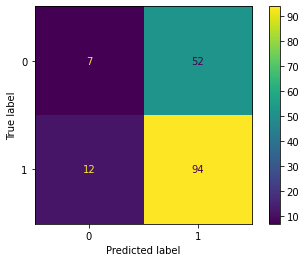

In [13]:
import matplotlib.pyplot as plt
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

<hr>

## Кросс-валидация

На прошлых занятиях рассматривался подход к проверке модели на так называемой "тестовой выборке" - некоторой части исходного набора данных, не пересекающийся с обучающим набором.

Для независимых наблюдений хорошей практикой считается выбор случайных наблюдений (объектов) или их перемешивание перед выборкой.

При этом можно наблюдать различные показатели качества обучения модели на одном и том же исходном наборе данных, но при формировании различных разбиений на обучающую и тестовую выборку.

На одном обучающем наборе также легко получить переобученную модель  

Существует ли какой-то подход учесть эти различия при валидации модели?



## GridSearch

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py